Este trabalho está licenciado sob a Licença Atribuição-CompartilhaIgual 4.0 Internacional Creative Commons. Para visualizar uma cópia desta licença, visite http://creativecommons.org/licenses/by-sa/4.0/ ou mande uma carta para Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

Autor/Instituição: Pedro H A Konzen / UFRGS

phkonzen@gmail.com

Criado: Out/2015 Última modificação: Out/2019

# Cálculo com Python

## Sobre

Este é um **minicurso** sobre **resolução de problemas** de **cálculo** diferencial e integral usando [Python][py] e a biblioteca de matemática simbólica [Sympy][sympy]. Não é necessário ter qualquer experiência na linguagem de programação [Python][py] para seguir este curso.

Neste minicurso você vai **aprender** a usar o [Python][py] para:

- manipular e graficar **funções** de uma variável;
- calcular **limites**;
- calcular **derivadas**;
- calcular **integrais** definidas e indefinidas.

Se você é um iniciante em [Python][py] não é necessário instalar nenhum programa em seu computador para seguir este curso. O material do curso está disponível em formatos `IPYNB` ([Jupyter notebook][jupy]) e em `HTML`.

[py]:https://www.python.org/
[sympy]:http://www.sympy.org/
[repo]:https://github.com/phkonzen/notas
[jupy]:http://jupyter.org/


## 1 - Funções de uma variável

Nesta primeira parte do minicurso **Cálculo com Python** você aprenderá a:

- definir funções;
- calcular valores de funções;
- graficar funções;
- calcular os zeros de funções.

### Inportando a biblioteca [Sympy][sympy]

O seguinte comando carrega a biblioteca de matemática simbólica [Sympy][sympy].

[sympy]:http://www.sympy.org/

In [1]:
from sympy import *
# seleciona a melhor saída disponível
init_printing()

#### Definindo símbolos para variáveis e funções

Na sequência, vamos ver como podemos usar o [Sympy][sympy] para lidarmos com funções reais de uma variável real, por exemplo: $y = f(x)$. Neste contexto, os símbolos $x$ e $y$ denotam as variáveis independente e dependente, respectivamente. Definimo o símbolo $x$ com a seguinte linha de comando:
[sympy]:http://www.sympy.org/

In [2]:
var('x')

Analogamente, definimos o símbolo $y$ com o comando:

In [3]:
var('y')

### Definindo funções

Vamos ver como definir uma função $y = f(x)$ para ser utilizada mais tarde. Por exemplo, consideremos a função:

$f(x) = (x^3 - 3x + 2)e^{-x/4} - 1$.

No [Python][py] os operadores aritméticos básicos são:
<pre><code>+</code> adição</pre> 
<pre><code>-</code> subtração</pre>
<pre><code>*</code> multiplicão</pre>
<pre><code>/</code> divisão</pre>
<pre><code>**</code> potenciação</pre>

Também, funções elementares já estão definidas por padrão. Veja a lista [aqui][func]!

Definimos a funcão dada digitando:
[py]:https://www.python.org/
[func]:http://docs.sympy.org/dev/modules/functions/index.html#contents

In [4]:
f = Lambda(x, (x**3 - 3*x + 2)*exp(-x/4) - 1)
f

Se quisermos calcular, por exemplo, f(1) digitamos:

In [5]:
f(1)

Note que a saída aparece na linha abaixo da entrada $f(1)$. Isto é, $f(1) = -1$. Podemos, inclusive utilizar argumentos simbólicos, como:

In [6]:
f(x-2)

Aqui, a saída significa que $f(x-2) = (-3x + (x-2)^3 + 8)e^{-\frac{x}{4} + \frac{1}{2}} - 1$, o que pode ser imediatamente verificado.

#### Exemplo:

Dada $g(x) = 2 - \sqrt{x^2 - 1}$, encontre $g(1)$, $g(0)$ e $g(2t)$.

Solução:

In [7]:
g = Lambda(x, 2 - sqrt(x**2 - 1))
g

In [8]:
g(1)

In [9]:
g(0)

Note que o sympy assume o domínio e a imagem da função como sendo um subconjunto dos números complexos. Além disso, antes de calcularmos $g(2t)$ precisamos definir $t$ como uma variável simbólica. Para que $t$ seja tratado como uma variável real, usamos o seguinte comando:

In [10]:
var('t', real=True)

Finalmente, computamos $g(2t)$ com:

In [11]:
g(2*t)

$\blacktriangleleft$

#### Exercício:

Dada $h(x) = \left|\sqrt{x} - 1\right| - 2\text{sen}(x)$, encontre $h(\pi)$, e $h(2u)$.

In [12]:
#digite a resposta aqui!

### Esboço do Gráfico

Para fazermos um esboço do gráfico de uma função f(x) podemos usar o comando `plot`. Por exemplo, para a $f(x)$ definida anteriormente, temos:

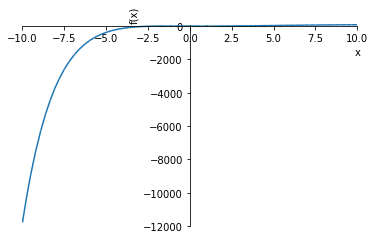

In [13]:
%matplotlib inline
plot(f(x))

- **Observação 1**: A "linha mágica" `%matplotlib inline` faz com que o gráfico apareça na mesma janela do ambiente. Sem esta linha, uma janela gráfica externa será aberta, quando disponível.

- **Observação 2**: O comando `plot(f(x))` tenta advinhar uma caixa gráfica adequada. Podemos alterar a caixa, informando o intervalo dos pontos de abscissa que gostaríamos de ver. Por exemplo:

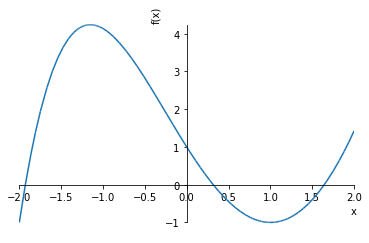

In [14]:
plot(f(x),(x,-2,2))

#### Exercício:

Faça o esboço do gráfico de $g(x) = 2\text{tg}\left(x+\frac{\pi}{3}\right)$.

In [15]:
#digite sua resolução aqui!

### Zeros de uma Função

O [SymPy][sympy] conta com a função `solve` para calcular a solução de $f(x) = 0$. Por exemplo:
[sympy]:http://www.sympy.org/

In [16]:
solve(x**2-1, x)

resolve $x^2 -1 = 0$. Entretanto a função `solve` não resolve diretamente a equação $f(x) = 0$ definida anteriormente. Veja o que ocorre:
[sympy]:http://www.sympy.org/

In [17]:
solve(f(x), x)

NotImplementedError: multiple generators [x, exp(x/4)]
No algorithms are implemented to solve equation (x**3 - 3*x + 2)*exp(-x/4) - 1

A última linha da mensagem de erro nos diz que a função `solve` não contém um algoritmo para resolver $f(x) = 0$, no caso da $f(x)$ dada. Alternativamente, podemos usar a função `nsolve` que usa um algoritmo numérico para encontrar uma solução para o problema.

Vejamos como usar esta função `nsolve`:

In [ ]:
nsolve(f(x), x, -2)

In [ ]:
nsolve(f(x), x, 0)

In [ ]:
nsolve(f(x), x, 2)

Na verdade, esta função $f(x)$ tem, ainda, um zero $x \approx 45,9162$. Discutiremos isso mais detalhadamente na próxima parte deste minicurso, quando estudarmos a computação de limites com o [SymPy](https://www.sympy.org). 

#### Exercício:

Determine os zeros de $g(x) = \text{sen}\left(x-\frac{\pi}{3}\right) + \frac{1}{2}$.

In [ ]:
#digite a resolução aqui!

## Referências

+ [1] Python Software Fundation (US): [www.python.org][python]

+ [2] Sympy - Python Library for Symbolic Mathematics: [www.sympy.org][sympy]

## Related links

+ [1] Sympy Gamma: [www.sympygamma.org][sympygamma]
+ [2] Sympy Live: [live.sympy.org][sympylive]
+ [3] Jupyter: [https://jupyter.org/](https://jupyter.org/)
+ [4] Binder: [https://mybinder.org/](https://mybinder.org/)


[python]: https://www.python.org/
[sympy]: http://www.sympy.org/en/index.html
[sympygamma]: http://www.sympygamma.com/
[sympylive]: http://live.sympy.org/

#### Next Topic: 2 - Limites